In [120]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import random
import csv
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame, read_csv
from sklearn.decomposition import PCA
from numpy.ma.core import ceil
from scipy.spatial import distance 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import animation, colors

In [121]:
#operating random framework
# reading the csv file

data= pd.read_csv("/Users/alsabbaghs/Downloads/hcvdat0.csv")
df=DataFrame(data)
data


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [122]:
#Extract the field names
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [123]:
print(df.dropna(how='all'))

print(data.head(615))

     Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1  69.0  
1    11.1

In [124]:
#dropping all missing values 
df.dropna(inplace=True)
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [125]:
#bool_series = pd.isnull(data["ALP"]) 
#data[bool_series] 

#bool_series = pd.notnull(data["ALP"]) 
#data[bool_series] 


In [126]:
#Clean data - mapping characters values to numerical values
data['Category'] = data.Category.map({'0=Blood Donor':0, '0s:suspect Blood Donor':0, '1=Hepatitis':1, '2=Fibrosis':2, '3=Cirrhosis':3})

data.Sex = data.Sex.apply(lambda x: 0 if x == 'm' else 1)


In [127]:
# Number of males and females 
num_of_sex = data.Sex.value_counts()
num_of_sex # It can be seen that there are more males than females in the dataset: a biased dataset.

0    377
1    238
Name: Sex, dtype: int64

/Users/alsabbaghs/Desktop/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sex', ylabel='Density'>

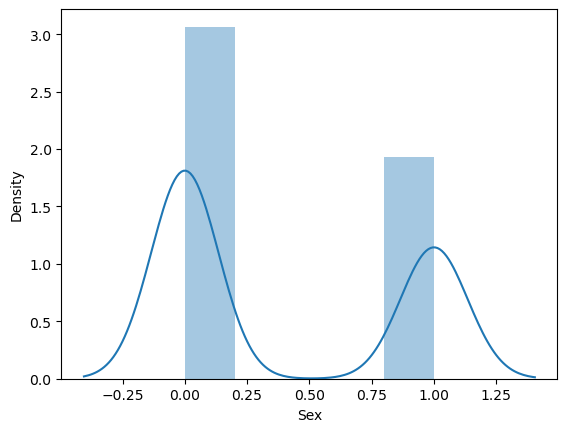

In [128]:
sns.distplot(dataset['Sex'])

In [129]:
#Number of each category
num_of_category = data.Category.value_counts()
num_of_category

0.0    533
3.0     30
1.0     24
2.0     21
Name: Category, dtype: int64

In [130]:
#Number of males and females by category
anum_of_sex_by_category = data.groupby('Category').Sex.value_counts()
anum_of_sex_by_category

Category  Sex
0.0       0      318
          1      215
1.0       0       20
          1        4
2.0       0       13
          1        8
3.0       0       20
          1       10
Name: Sex, dtype: int64

In [131]:
#Mean age by category
mean_age_by_category = data.groupby('Category').Age.mean()
mean_age_by_category

Category
0.0    47.131332
1.0    38.708333
2.0    52.333333
3.0    53.466667
Name: Age, dtype: float64

In [132]:
#we can tell a lot about the data symmatry by evaluating the mean of the diseases 1,2,3 by catagory and sex

#Mean age by sex
mean_age_by_sex = data.groupby('Sex').Age.mean()
mean_age_by_sex #Very similar mean age between sexs

Sex
0    47.212202
1    47.718487
Name: Age, dtype: float64

In [133]:
#Mean Albumin levels by sex 
mean_ALB_by_sex = data.groupby('Sex').ALB.mean()
mean_ALB_by_sex #ALB levels are quite similar between male and females

Sex
0    42.291755
1    40.559244
Name: ALB, dtype: float64

In [134]:
#Mean Alanine transaminase levels by sex
mean_ALT_by_sex = data.groupby('Sex').ALT.mean()
mean_ALT_by_sex  # ALT levels seem to be higher in males

Sex
0    31.728191
1    23.273109
Name: ALT, dtype: float64

In [135]:
#Mean cholesterol levels by category 
mean_CHOL_by_sex = data.groupby('Sex').CHOL.mean()
mean_CHOL_by_sex #Very similar cholesterol levels in males and females

Sex
0    5.341230
1    5.411602
Name: CHOL, dtype: float64

In [136]:
#Mean creatinine by category
mean_CREA_by_sex = data.groupby('Sex').CREA.mean()
mean_CREA_by_sex#CREA levels seem to be higher in males

Sex
0    87.591777
1    71.302101
Name: CREA, dtype: float64

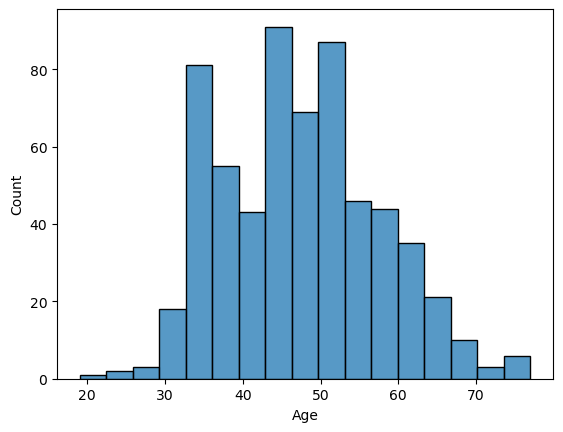

In [137]:
#Histogram of age
sns.histplot(data=data, x='Age')
plt.show()

/Users/alsabbaghs/Desktop/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

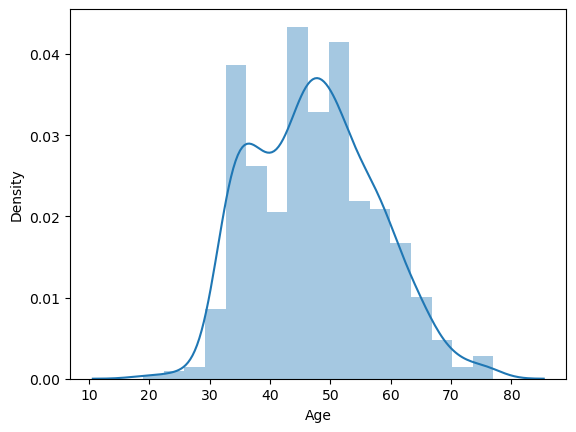

In [138]:
sns.distplot(dataset['Age'])

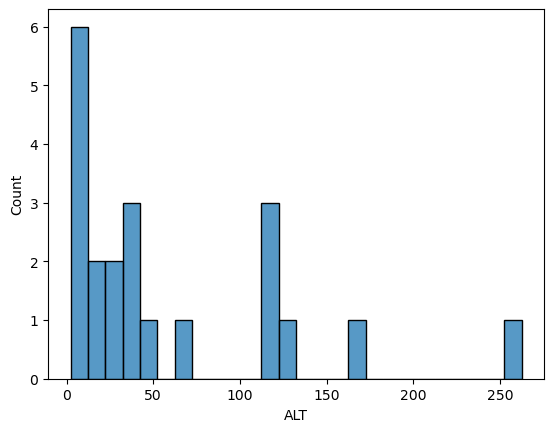

In [139]:
#ALT histogram for people with fibrosis (category 2) - Maybe some outliers in this data based on the distribution shown in the histogram
ALT_category2 = data[data.Category == 2.0]
ALT_category2
sns.histplot(data=ALT_category2, x='ALT', binwidth=10)
plt.show()

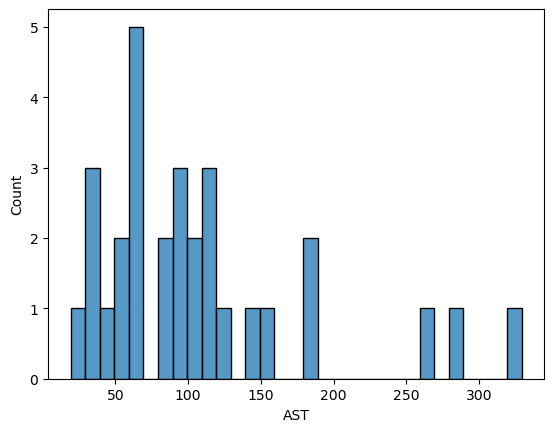

In [140]:
#AST histogram for people with cirrhosis (category 3)
AST_category3 = data[data.Category == 3.0]
AST_category3
sns.histplot(data=AST_category3, x='AST', binwidth=10)
plt.show()

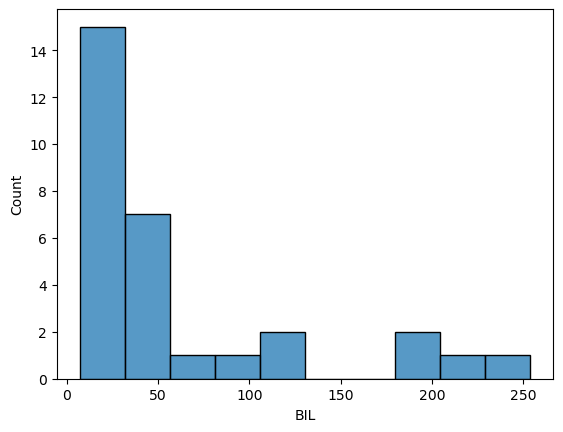

In [141]:
#BIL histogram for people with cirrhosis (category 3) - Possible right skew
BIL_category3 = data[data.Category == 3.0]
BIL_category3
sns.histplot(data=BIL_category3, x='BIL')
plt.show()

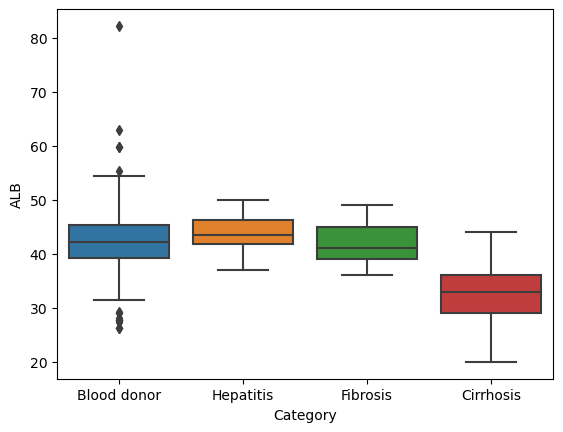

In [142]:
#ALB boxplot by category
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='ALB')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

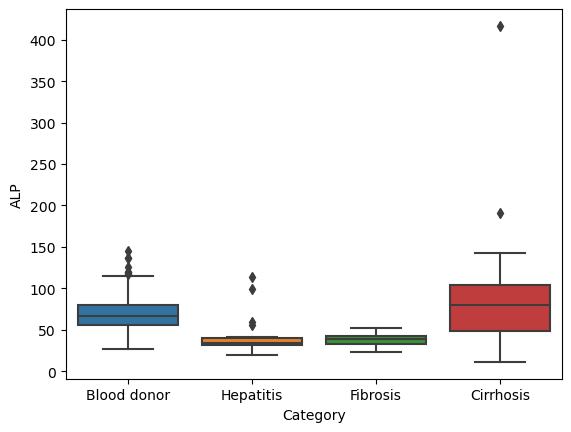

In [143]:
#ALP boxplot by category - There are large outliers in the cirrhosis category
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='ALP')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

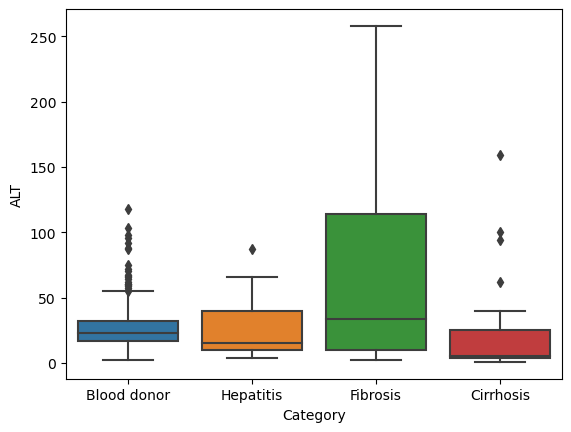

In [144]:
# ALT boxplot by category/// this is all for all non-disease catagories 
ax = plt.subplot()
sns.boxplot(data=data, x='Category', y='ALT')
ax.set_xticklabels(['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
plt.show()

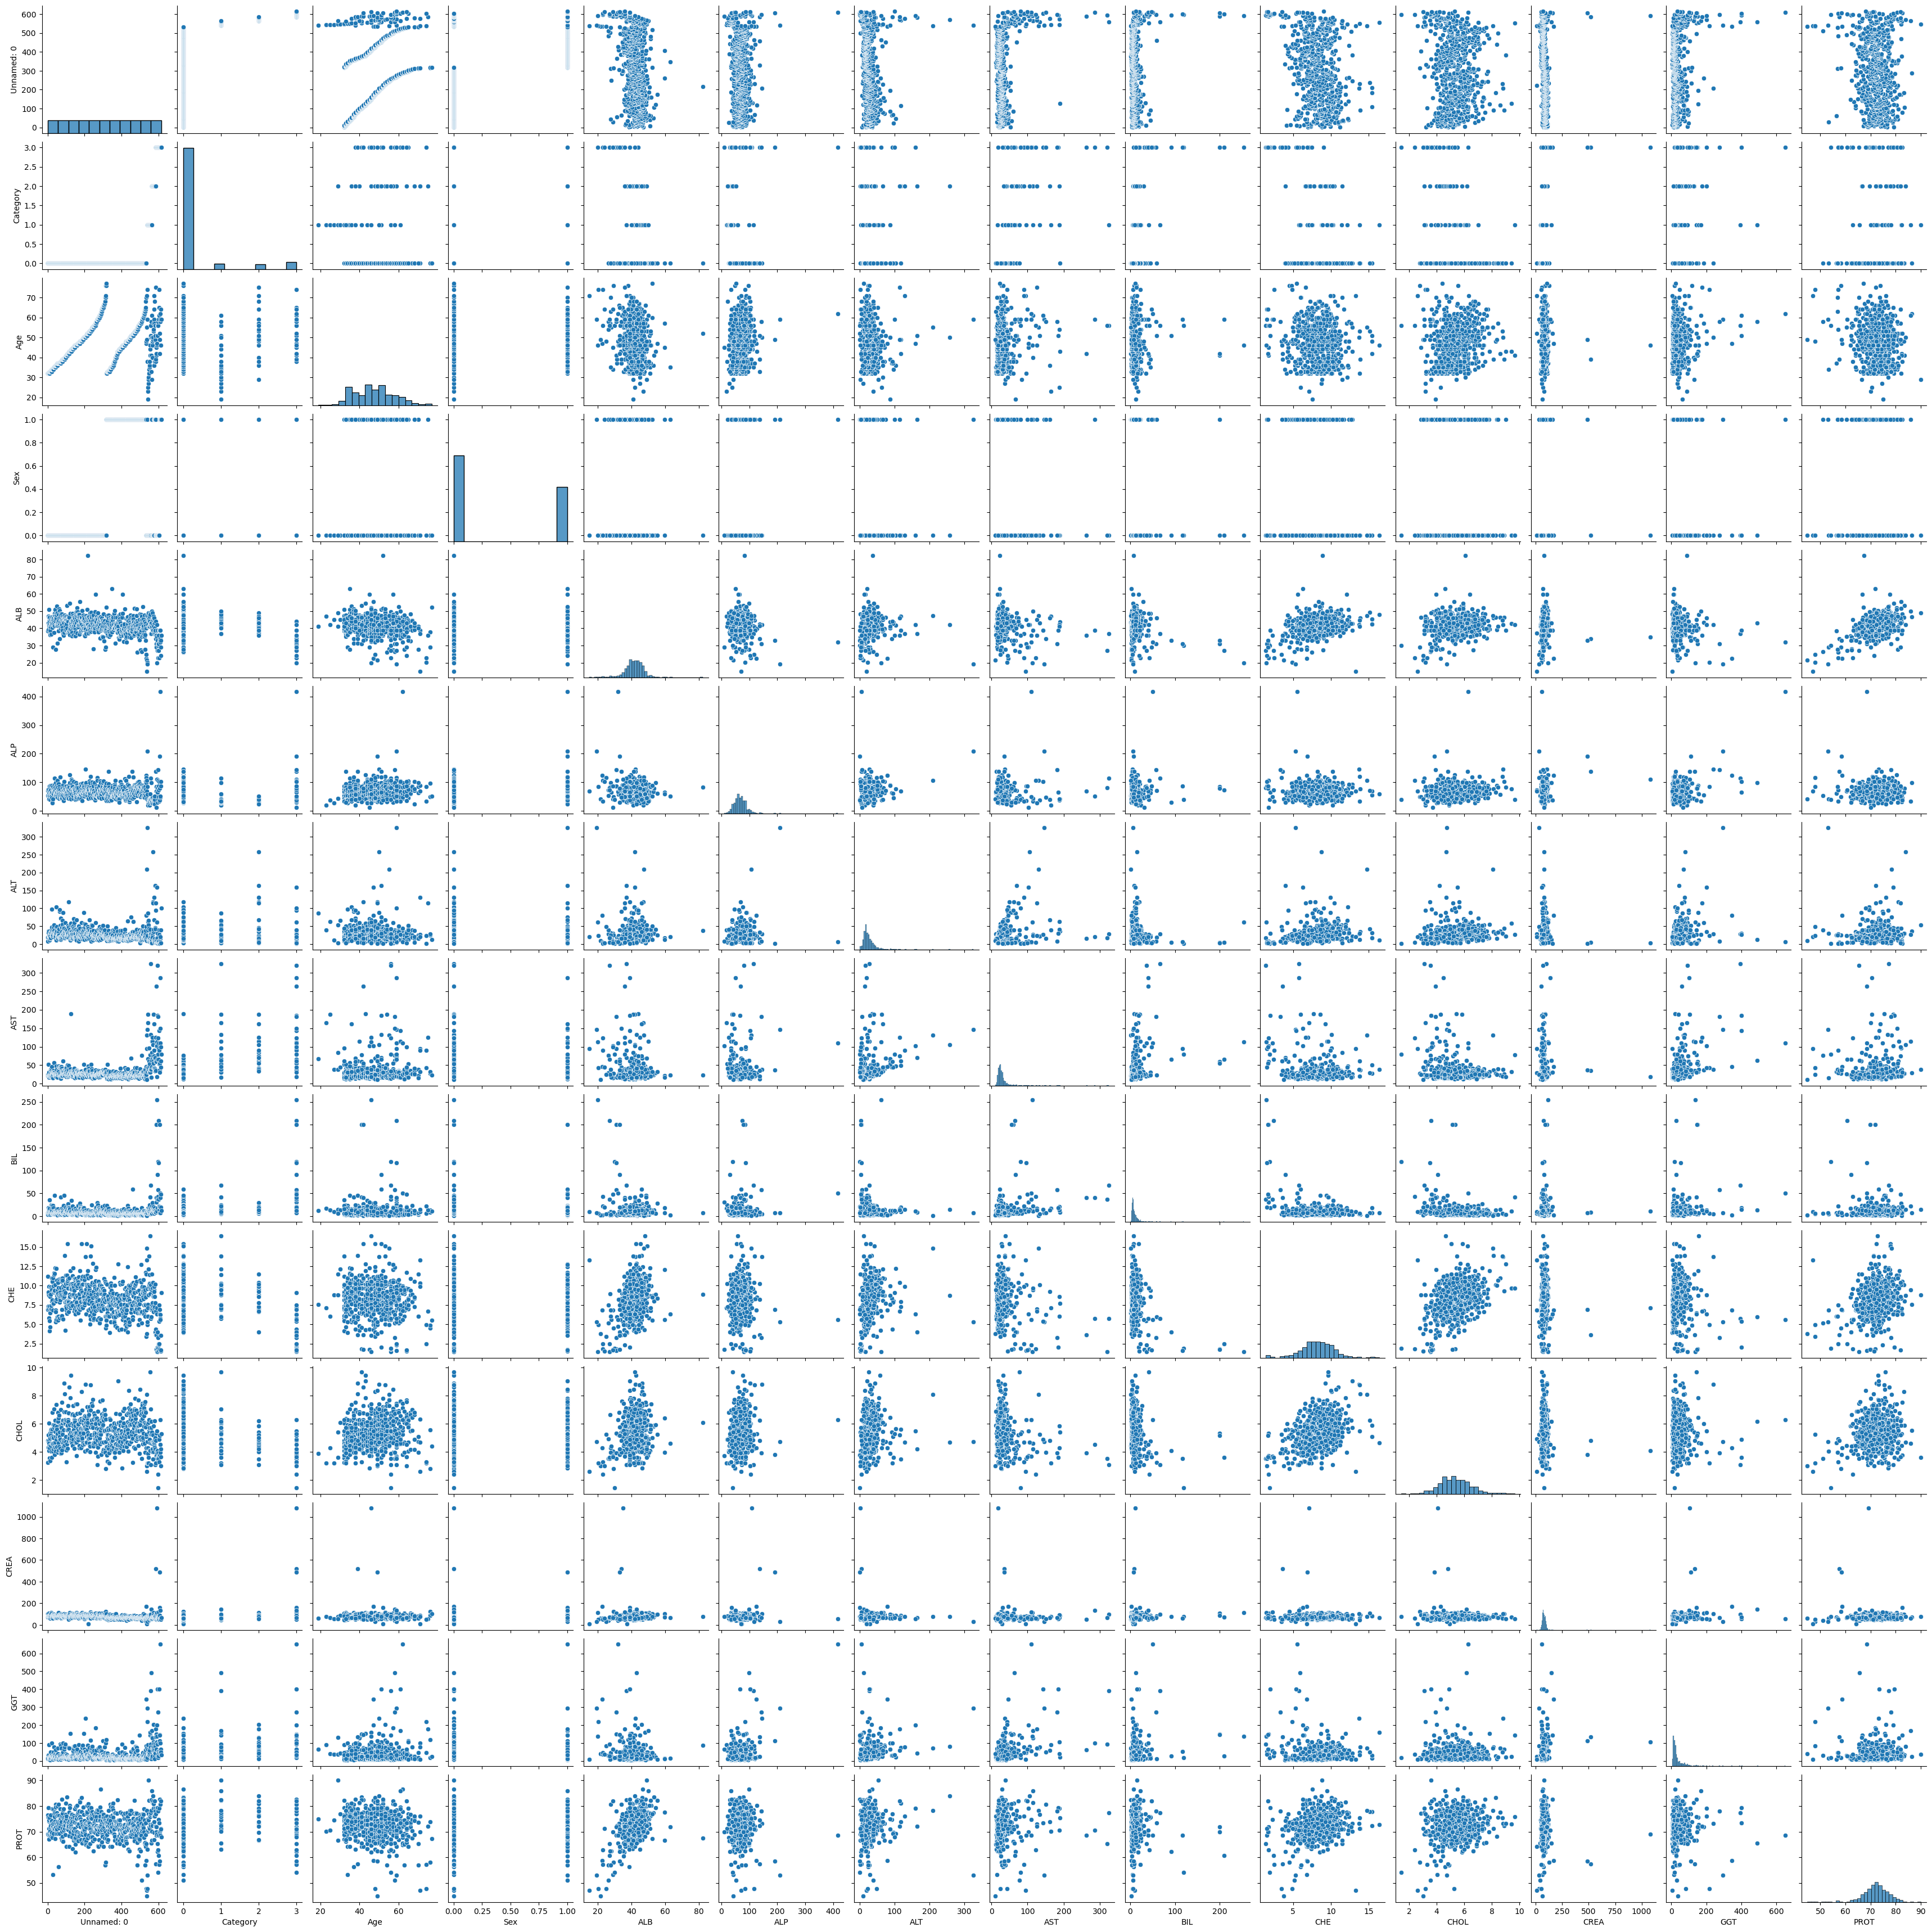

In [145]:
#Pairplot of data - Not the clearest plot but can see some variables that have correlations between each other
sns.pairplot(data)
plt.show()


In [146]:
#Standardising data before implementing ML algorithms
data_without_categories = data[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].dropna() # drop the NaNs from the relevant data
labels = data[['Category']]
scaler = StandardScaler() # Standardising class from sklearn
scaled_data = scaler.fit_transform(data_without_categories) # Standardise data

In [147]:
data_pca = PCA(n_components=12) # Do 12 components at first and then can choose which to keep later
components = data_pca.fit(scaled_data).components_ # Creating dummy variable so we can see which components we want to include before changing the actual dataset
components = pd.DataFrame(components).transpose() 
components.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10', 'Comp11', 'Comp12']
components.index =  data_without_categories.columns
components

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11,Comp12
Age,0.172134,0.102528,0.410235,-0.141937,-0.317705,-0.615725,-0.402228,-0.118344,0.287541,0.147092,0.064996,-0.083858
Sex,0.022322,-0.287773,0.343857,-0.374166,-0.215527,0.598740,-0.140062,0.254792,0.179616,0.229658,0.289384,-0.014983
ALB,-0.448982,0.132416,-0.313601,-0.036295,-0.212278,0.023960,-0.149646,-0.310266,0.226894,-0.215431,0.534160,0.365658
ALP,0.175163,0.415676,0.337492,0.119458,-0.200408,0.326156,0.235772,-0.491128,0.002312,0.174225,-0.244964,0.366957
ALT,-0.029360,0.435170,0.063373,-0.073419,0.593255,0.107071,0.021252,0.082240,0.632616,-0.008330,0.028163,-0.169300
AST,0.333897,0.288781,-0.337455,-0.312787,0.099462,-0.012337,-0.361566,0.335600,-0.160109,0.153726,-0.108180,0.528237
BIL,0.328683,0.037158,-0.353025,-0.142870,-0.316459,-0.173983,0.647900,0.128330,0.272959,0.236256,0.211019,-0.063536
CHE,-0.431579,0.281027,0.114303,0.063003,0.134168,-0.139634,0.095254,0.129425,-0.360271,0.669660,0.268165,-0.065221
CHOL,-0.313387,0.269531,0.354637,-0.167320,-0.211260,-0.132910,0.308452,0.507826,-0.059760,-0.452935,-0.119190,0.192679
CREA,0.062715,0.133189,-0.067778,0.773116,-0.295809,0.149773,-0.214951,0.410293,0.214265,0.071561,0.022615,0.002184


In [148]:
var_ratio = data_pca.explained_variance_ratio_ # Find the amount of variance explained by each components
var_ratio= pd.DataFrame(var_ratio).transpose() # Transposes the data to make it easier to read
var_ratio.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10', 'Comp11', 'Comp12']
var_ratio.index = ['Proportion of Variance']
var_ratio

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11,Comp12
Proportion of Variance,0.204596,0.161009,0.118306,0.093358,0.087178,0.077772,0.059891,0.052265,0.047341,0.03895,0.032881,0.026452


In [149]:
data_pcomp = data_pca.fit_transform(scaled_data)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp = data_pcomp.iloc[:,0:11]
data_pcomp.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10', 'Comp11']
data_pcomp.head()

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11
0,0.623917,-1.715135,-1.393532,1.498619,0.837848,0.458334,0.045456,-0.574277,-0.736804,0.089906,-0.307661
1,-1.114720,-0.052790,-0.803039,0.585460,0.686483,0.444380,0.570405,-0.236584,-1.275217,0.965889,-0.900748
2,-1.167694,0.930200,-1.675495,0.103909,0.381158,0.869208,0.020674,-0.300067,-0.143235,-0.047137,-0.685328
3,-0.421024,-0.321216,-1.725682,0.327997,0.489290,0.455055,0.653352,-0.221089,0.054020,-0.408415,-0.342520
4,0.092011,-0.190595,-0.633850,0.898238,1.410894,0.529664,0.791346,-0.516654,-0.611468,0.332327,-0.101663


In [150]:
#Kmeans and model inertia comparisons
Kmeans_model = KMeans(n_clusters=4, init='random')
Kmeans_model.fit(data_pcomp)
Kmeans_model.inertia_ 
#represents the sum of squared distances of all data points to their nearest cluster center. 
#In other words, it measures the sum of the squared distances between each data point and its assigned cluster center.

4785.126306467352

In [151]:
Kmeans_plus_model = KMeans(n_clusters=4, init='k-means++')
Kmeans_plus_model.fit(data_pcomp)
Kmeans_plus_model.inertia_

4782.73186873856

In [152]:
#K means model using original data (not PCA data)
data_without_categories = data[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].dropna() # drop the NaNs from the relevant data
scaled_data = scaler.fit_transform(data_without_categories)

In [153]:
Kmeans_model_without_pca = KMeans(n_clusters=4, init='random')
Kmeans_model.fit(scaled_data)
Kmeans_model.inertia_

5057.812902065872

In [154]:
Kmeans_model_without_pca = KMeans(n_clusters=4, init='k-means++')
Kmeans_model.fit(scaled_data)
Kmeans_model.inertia_ 
#K means ++ algorithm seems to give a lower inertia than the k means algorithm. This could be due to the random intialisation of the centroids in the k means algorithm. It can also be seen that these models give higher inertias than when the PCA data was used.



5075.078625459033

In [156]:
data_x = dataset.drop(['Category'], axis =1)
data_y = dataset['Category']

In [157]:
data_x.dropna(inplace=True)

In [160]:
data_x.isna().sum()

Age     0
Sex     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64

In [178]:
df = pd.read_csv("/Users/alsabbaghs/Downloads/hcvdat0.csv")
df = df.dropna()
df["Category"].value_counts()


0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [179]:
#Data-set Symmetry and Bonary classification  
gender = []
for i in df["Sex"]:
  if i == "m":
    gender.append(1)
  else:
    gender.append(0) #assisging numweric values 
df = df.drop("Sex", axis = 1)
df["Gender"] = gender

df = df.drop(df.columns[0], axis = 1)

replace_dict = {"0=Blood Donor": "0", "0s=suspect Blood Donor": "1", "1=Hepatitis" : "2", "2=Fibrosis" : "3", "3=Cirrhosis" : "4"}
df["Category"] = df["Category"].replace(replace_dict)
df["Category"] = pd.to_numeric(df["Category"])
df.head()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Gender
0,0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,0,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,0,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1
3,0,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1
4,0,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1


In [164]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [165]:
scaler = StandardScaler()
data_cluster = scaler.fit_transform(df)
kmeans = KMeans(n_clusters = 2, random_state = 42)

kmeans.fit(data_cluster)
labels = kmeans.labels_

V1 = []
for i in df["Category"]:
  if i == 0:
    V1.append(0)
  else: 
    V1.append(1)
cm = confusion_matrix(V1, labels)
accuracy_2cluster = accuracy(cm) 
print("Accuracy with 2 clusters: ", accuracy_2cluster)

new_df = df[labels == 1]
n_kmeans = KMeans(n_clusters = 4, random_state = 42)
n_kmeans.fit(new_df)
new_labels = n_kmeans.labels_
for i in range(len(new_labels)):
  new_labels[i] += 1
print(new_labels)

j = 0
for i in range(len(labels)):
  if labels[i] == 1:
    labels[i] = new_labels[j]
    j += 1
n_cm = confusion_matrix(V1, labels)
last_accuracy = accuracy(n_cm)
print("Final Accuracy: ", last_accuracy)


Accuracy with 2 clusters:  0.9524617996604414
[3 1 3 1 1 3 3 1 1 1 1 4 1 1 1 2 3 1 1 1 1 3 1 1 1 3 1 1 4 1 1 1 3 1 1]
Final Accuracy:  0.933786078098472


In [166]:
n_cm

array([[526,   0,   0,   0,   0],
       [ 28,  24,   1,   8,   2],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]])

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Category", axis = 1), df["Category"], test_size = 0.2857, random_state = 42, shuffle = True)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(420, 12) (420,) (169, 12) (169,)


In [180]:
#Normalization
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

#Euclidean distance
def e_distance(x, y):
    return distance.euclidean(x, y)

#Manhanttan distance
def m_distance(x, y):
    return distance.cityblock(x, y)

#Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

#Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range



In [181]:
grid = [[6, 6], [6, 8], [4, 6], [5, 7], [10, 10], [5, 5], [15, 15]] #could increase for more iteriations for better accuracy
max_m_dsitance = 12
max_learning_rate = 0.5
max_steps = 75000
loop = [500, 1000, 5000, 10000, 20000, 50000]



In [170]:
# normalisation
train_x_norm = minmax_scaler(X_train) 
data = minmax_scaler(X_test) 

# initialising self-organising map
num_dims = train_x_norm.shape[1]
np.random.seed(40)


# start training iterations

for j in range(len(grid)):
  num_rows = grid[j][0]
  num_cols = grid[j][1]
  som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction
  print("Grid " f"{num_rows} x {num_cols}:")
  for step in range(max_steps):
    learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

    t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    for row in range(num_rows):
      for col in range(num_cols):
        if m_distance([row,col],winner) <= neighbourhood_range:
          som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight
    for i in loop:
      if step == i:
        label_data = np.array(Y_train)
        map = np.empty(shape=(num_rows, num_cols), dtype=object)

        for row in range(num_rows):
          for col in range(num_cols):
            map[row][col] = [] # empty list to store the label

        for t in range(train_x_norm.shape[0]):
          winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
          map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron
        
        label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
        for row in range(num_rows):
          for col in range(num_cols):
            label_list = map[row][col]
            if len(label_list)==0:
              label = 2
            else:
              label = max(label_list, key=label_list.count)
            label_map[row][col] = label
        
        winner_labels = []

        for t in range(data.shape[0]):
          winner = winning_neuron(data, t, som, num_rows, num_cols)
          row = winner[0]
          col = winner[1]
          predicted = label_map[row][col]
          winner_labels.append(predicted)

        print("Loop " f"{i}: "  "Accuracy: ",accuracy_score(Y_test, np.array(winner_labels)))

#print("SOM training completed")

Grid 6 x 6:
Loop 500: Accuracy:  0.8520710059171598
Loop 1000: Accuracy:  0.8520710059171598
Loop 5000: Accuracy:  0.8520710059171598
Loop 10000: Accuracy:  0.8520710059171598
Loop 20000: Accuracy:  0.8461538461538461
Loop 50000: Accuracy:  0.8520710059171598
Grid 6 x 8:
Loop 500: Accuracy:  0.8520710059171598
Loop 1000: Accuracy:  0.8520710059171598
Loop 5000: Accuracy:  0.8520710059171598
Loop 10000: Accuracy:  0.8520710059171598
Loop 20000: Accuracy:  0.8520710059171598
Loop 50000: Accuracy:  0.7869822485207101
Grid 4 x 6:
Loop 500: Accuracy:  0.8520710059171598
Loop 1000: Accuracy:  0.8520710059171598
Loop 5000: Accuracy:  0.8520710059171598
Loop 10000: Accuracy:  0.8520710059171598
Loop 20000: Accuracy:  0.8520710059171598
Loop 50000: Accuracy:  0.8520710059171598
Grid 5 x 7:
Loop 500: Accuracy:  0.8520710059171598
Loop 1000: Accuracy:  0.8520710059171598
Loop 5000: Accuracy:  0.8520710059171598
Loop 10000: Accuracy:  0.8520710059171598
Loop 20000: Accuracy:  0.8520710059171598
Lo

In [175]:
#Parameters 
num_rows = 6
num_cols = 6
max_m_dsitance = 12
max_learning_rate = 0.5
max_steps = 25000


In [176]:
# Normalisation
train_x_norm = minmax_scaler(X_train)
data = minmax_scaler(X_test)


# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction


# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) 
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) 
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
SOM training completed


In [173]:
label_data = np.array(Y_train)
map = np.empty(shape=(num_rows, num_cols), dtype=object)


for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] 

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  #print(winner)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron


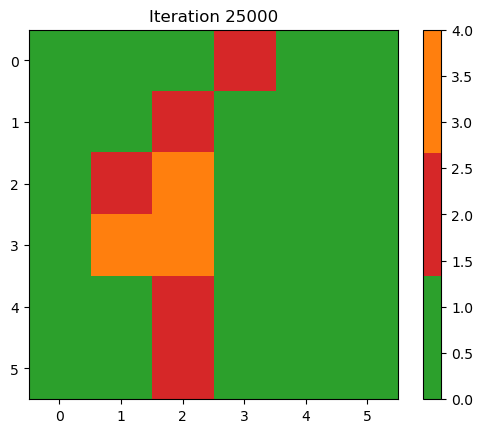

In [174]:
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [ ]:
##Kmeans
#For binary classification for 0 (non-disease) and 1 (disease) using Kmean with 2 clusters, the accuracy = 0.95. 
#dropped non-disease and used 4 clusters (for the catagories of 0s, 1, 2, 3), the accuracy = 0.93
#Final accuracy using k-mean = 0.93


##SOM
#Initially, the data-set was split to be trianed and tested and then used grids and iteration, the highest accuracy = 0.74 (could not create more itirations becuase of computer power)

#Kmeans clustering yeilds higher accuracy value than SOM with an accuracy = 0.93
#The accuracy of a clustering algorithm depends on the evaluation metric used and the specific dataset being analyzed. As indicated by the model inertia

In [16]:
#Helpful work from last class 
#0 for Non-Disease and 1 for Disease
data.replace({'Sex':{'m':0,'f':1}}, inplace=True)
# encoding Category column
data.replace({'Category':{'0=Blood Donor':0,'0s=suspect Blood Donor':0, '1=Hepatitis':1, '2=Fibrosis':1, '3=Cirrhosis':1}}, inplace=True)
dataset = data.drop(columns=['Unnamed: 0'])
dataset.head()
dataset.shape
print(dataset)

     Category  Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA  \
0           0   32    0  38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   
1           0   32    0  38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   
2           0   32    0  46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   
3           0   32    0  43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   
4           0   32    0  39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   
..        ...  ...  ...   ...    ...    ...    ...   ...    ...   ...    ...   
610         1   62    1  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7   
611         1   64    1  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   
612         1   64    1  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   
613         1   46    1  33.0    NaN   39.0   62.0  20.0   3.56  4.20   52.0   
614         1   59    1  36.0    NaN  100.0   80.0  12.0   9.07  5.30   67.0   

       GGT  PROT  
0     12.1  69.0  
1

In [65]:
#Kmean_Clustering  
data.shape
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [66]:
data.dtypes


Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [67]:
data.isna().sum()

#18 values in row ALP, 10 values in row CHOL, 1 value in PROT, ALB, ALT 
#Drop missing values 

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [69]:
data.dropna(inplace=True)

In [70]:
data.isna().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [81]:
non_numeric_cols = data.select_dtypes(exclude='number').columns

In [82]:
numeric_cols = data.select_dtypes(include='number').columns
data_scale = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

In [85]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(data_scale)
data['Cluster'] = clusters.predict(data_scale)
data_scale['Cluster'] = clusters.predict(data_scale)

In [86]:
data_scale['Cluster'].value_counts(sort=False) #shows that the dataset is biased

#drop o values (no disease)

1    555
0     34
Name: Cluster, dtype: int64

In [87]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(data_scale)
pca_x = pca.transform(data_scale)
pca_df = pd.DataFrame([pca_x[:, 0], pca_x[:, 1]]).T
pca_df.columns = ['PC1', 'PC2']

In [89]:
data.groupby('Cluster').median() 
# will have to split ages to catagories

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Cluster,,,,,,,,,,,,
0,593.0,58.0,29.6,85.5,8.3,78.75,21.0,3.70,3.765,66.8,74.3,64.05
1,279.0,47.0,42.2,65.5,23.0,25.30,7.0,8.39,5.380,77.0,21.9,72.30


In [90]:
data_scale.drop(columns=['Cluster'], inplace=True)
data.drop(columns=['Cluster'], inplace=True)